## ISYE6501x Homework 7


## Loading Libraries

In [1]:
options(warn=-1)

In [1]:
install.packages("rpart")

Installing package into 'C:/Users/fayal/R/win-library/3.6'
(as 'lib' is unspecified)



package 'rpart' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\fayal\AppData\Local\Temp\RtmpcpaUC7\downloaded_packages


In [24]:
install.packages("tree")

Installing package into 'C:/Users/fayal/R/win-library/3.6'
(as 'lib' is unspecified)



package 'tree' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\fayal\AppData\Local\Temp\RtmpcpaUC7\downloaded_packages


In [2]:
library(tree)

In [3]:
library(rpart)

In [4]:
library(ggplot2)

In [5]:
library(tidyverse)

Registered S3 method overwritten by 'cli':
  method     from
  print.tree tree

-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v tibble  2.1.3     v dplyr   0.8.3
v tidyr   1.0.0     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
v purrr   0.3.3     

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



In [6]:
library(caret)

Loading required package: lattice


Attaching package: 'caret'


The following object is masked from 'package:purrr':

    lift




In [7]:
library(ROCR)

Loading required package: gplots


Attaching package: 'gplots'


The following object is masked from 'package:stats':

    lowess




In [8]:
install.packages("AUC")

Installing package into 'C:/Users/fayal/R/win-library/3.6'
(as 'lib' is unspecified)



package 'AUC' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\fayal\AppData\Local\Temp\RtmpMPzG3E\downloaded_packages


In [9]:
library(AUC)

AUC 0.3.0

Type AUCNews() to see the change log and ?AUC to get an overview.


Attaching package: 'AUC'


The following objects are masked from 'package:caret':

    sensitivity, specificity




In [285]:
install.packages("randomForest")

Installing package into 'C:/Users/fayal/R/win-library/3.6'
(as 'lib' is unspecified)



package 'randomForest' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\fayal\AppData\Local\Temp\RtmpcpaUC7\downloaded_packages


In [42]:
library(randomForest)

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The following object is masked from 'package:dplyr':

    combine


The following object is masked from 'package:ggplot2':

    margin




## Question 10.1

Using the same crime data set uscrime.txt as in Questions 8.2 and 9.1, find the best model you can
using
(a) a regression tree model, and
(b) a random forest model.
In R, you can use the tree package or the rpart package, and the randomForest package. For
each model, describe one or two qualitative takeaways you get from analyzing the results (i.e., don’t just stop when you have a good model, but interpret it too).


### Loading Crime Data

In [10]:
#loading data
crime=read_tsv("uscrime.txt")

Parsed with column specification:
cols(
  M = col_double(),
  So = col_double(),
  Ed = col_double(),
  Po1 = col_double(),
  Po2 = col_double(),
  LF = col_double(),
  M.F = col_double(),
  Pop = col_double(),
  NW = col_double(),
  U1 = col_double(),
  U2 = col_double(),
  Wealth = col_double(),
  Ineq = col_double(),
  Prob = col_double(),
  Time = col_double(),
  Crime = col_double()
)



Criminologists are interested in the effect of punishment regimes on crime rates. This has been studied using aggregate data on 47 states of the USA for 1960. The data set contains the following columns:

    Variable   Description
    M		percentage of males aged 14–24 in total state population
    So		indicator variable for a southern state
    Ed		mean years of schooling of the population aged 25 years or over
    Po1		per capita expenditure on police protection in 1960
    Po2		per capita expenditure on police protection in 1959
    LF		labour force participation rate of civilian urban males in the age-group 14-24
    M.F		number of males per 100 females
    Pop		state population in 1960 in hundred thousands
    NW		percentage of nonwhites in the population
    U1		unemployment rate of urban males 14–24
    U2		unemployment rate of urban males 35–39
    Wealth	wealth: median value of transferable assets or family income
    Ineq	income inequality: percentage of families earning below half the median income
    Prob	probability of imprisonment: ratio of number of commitments to number of offenses
    Time	average time in months served by offenders in state prisons before their first release
    Crime		crime rate: number of offenses per 100,000 population in 1960

In [11]:
#checking the data
head(crime)

M,So,Ed,Po1,Po2,LF,M.F,Pop,NW,U1,U2,Wealth,Ineq,Prob,Time,Crime
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
15.1,1,9.1,5.8,5.6,0.510,95.0,33,30.1,0.108,4.1,3940,26.1,0.084602,26.2011,791
14.3,0,11.3,10.3,9.5,0.583,101.2,13,10.2,0.096,3.6,5570,19.4,0.029599,25.2999,1635
14.2,1,8.9,4.5,4.4,0.533,96.9,18,21.9,0.094,3.3,3180,25.0,0.083401,24.3006,578
13.6,0,12.1,14.9,14.1,0.577,99.4,157,8.0,0.102,3.9,6730,16.7,0.015801,29.9012,1969
14.1,0,12.1,10.9,10.1,0.591,98.5,18,3.0,0.091,2.0,5780,17.4,0.041399,21.2998,1234
12.1,0,11.0,11.8,11.5,0.547,96.4,25,4.4,0.084,2.9,6890,12.6,0.034201,20.9995,682


### Building Regression Tree 

In [12]:
set.seed(1)

#regression tree using all variables
crime.tree<-tree(Crime~.,crime)
summary(crime.tree)


Regression tree:
tree(formula = Crime ~ ., data = crime)
Variables actually used in tree construction:
[1] "Po1" "Pop" "LF"  "NW" 
Number of terminal nodes:  7 
Residual mean deviance:  47390 = 1896000 / 40 
Distribution of residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-573.900  -98.300   -1.545    0.000  110.600  490.100 

Note: Normality of the residuals is an assumption of running a linear model. So, if residuals are normal, it means that assumption is valid and model inference (confidence intervals, model predictions) should also be valid. 
The mean=0 indicates our model is valid.

It seems that the most significant predictors are:

    -Po1:per capita expenditure on police protection in 1960
    -Pop: state population in 1960 in hundred thousands
    -LF:labour force participation rate of civilian urban males in the age-group 14-24
    -NW: percentage of nonwhites in the population



We can also plot crime rate versus Po1. As we can observe, there is a strong correlation between these two:

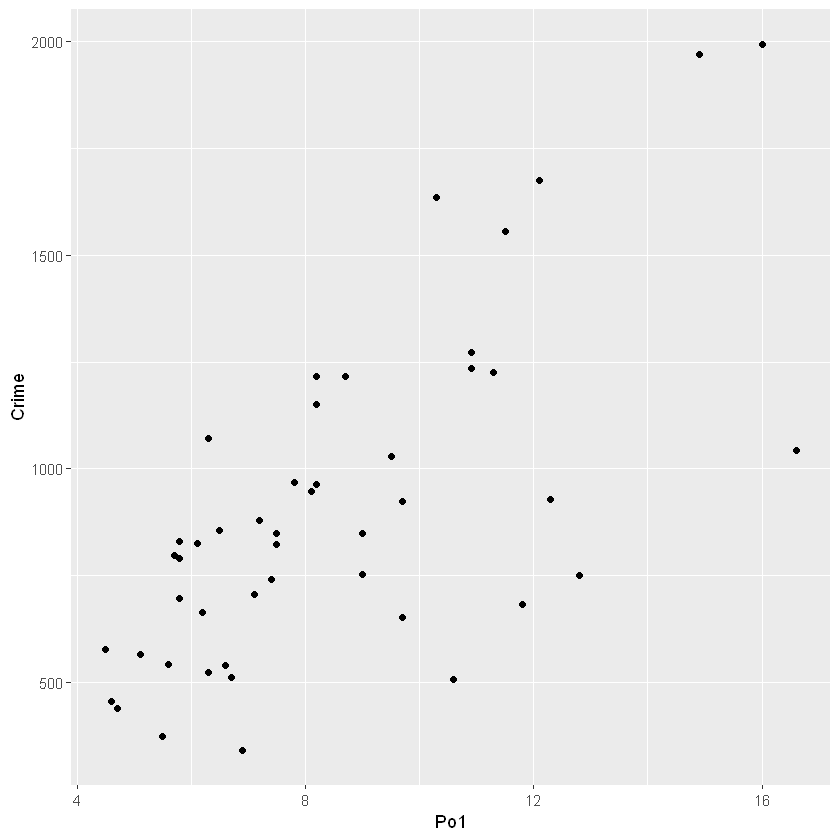

In [13]:
ggplot(crime,aes(x=Po1,y=Crime))+
geom_point()

We can look at the tree and see how the data set is divided:

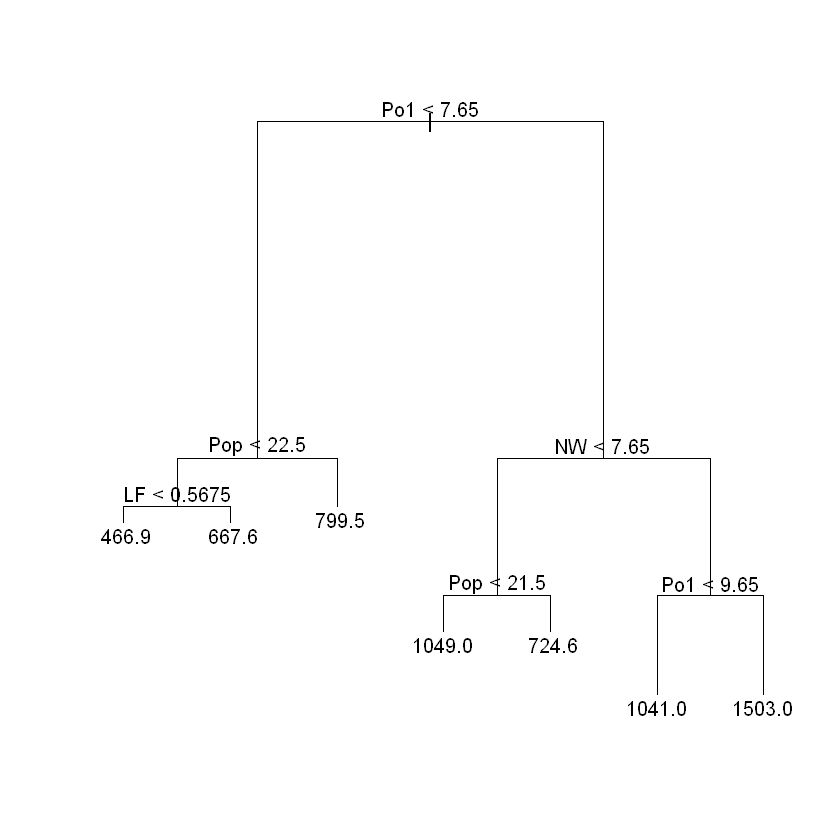

In [15]:
plot(crime.tree)
text(crime.tree,pretty=0)

In [247]:
print(crime.tree)

node), split, n, deviance, yval
      * denotes terminal node

 1) root 47 6881000  905.1  
   2) Po1 < 7.65 23  779200  669.6  
     4) Pop < 22.5 12  243800  550.5  
       8) LF < 0.5675 7   48520  466.9 *
       9) LF > 0.5675 5   77760  667.6 *
     5) Pop > 22.5 11  179500  799.5 *
   3) Po1 > 7.65 24 3604000 1131.0  
     6) NW < 7.65 10  557600  886.9  
      12) Pop < 21.5 5  146400 1049.0 *
      13) Pop > 21.5 5  147800  724.6 *
     7) NW > 7.65 14 2027000 1305.0  
      14) Po1 < 9.65 6  170800 1041.0 *
      15) Po1 > 9.65 8 1125000 1503.0 *


In [222]:
names(crime.tree)

[1] "frame"   "where"   "terms"   "call"    "y"       "weights"

In [223]:
crime.tree$frame

,var,n,dev,yval,splits
,<fct>,<dbl>,<dbl>,<dbl>,"<chr[,2]>"
1,Prob,35,3333946.97,877.1714,"<0.042399, >0.042399"
2,NW,16,1883259.94,1058.4375,"<7.75 , >7.75"
4,M.F,10,284254.90,871.1000,"<98.45 , >98.45"
8,<leaf>,5,22802.80,735.2000,","
9,<leaf>,5,76764.00,1007.0000,","
5,<leaf>,6,663129.33,1370.6667,","
3,NW,19,482258.74,724.5263,"<6.05 , >6.05"
6,<leaf>,8,117042.00,601.5000,","
7,Po1,11,156072.00,814.0000,"<5.95 , >5.95"


### Regression Tree Evaluation , calculating R-Squared

In [16]:
#prediction on whole data set
crime.pred<-predict(crime.tree)

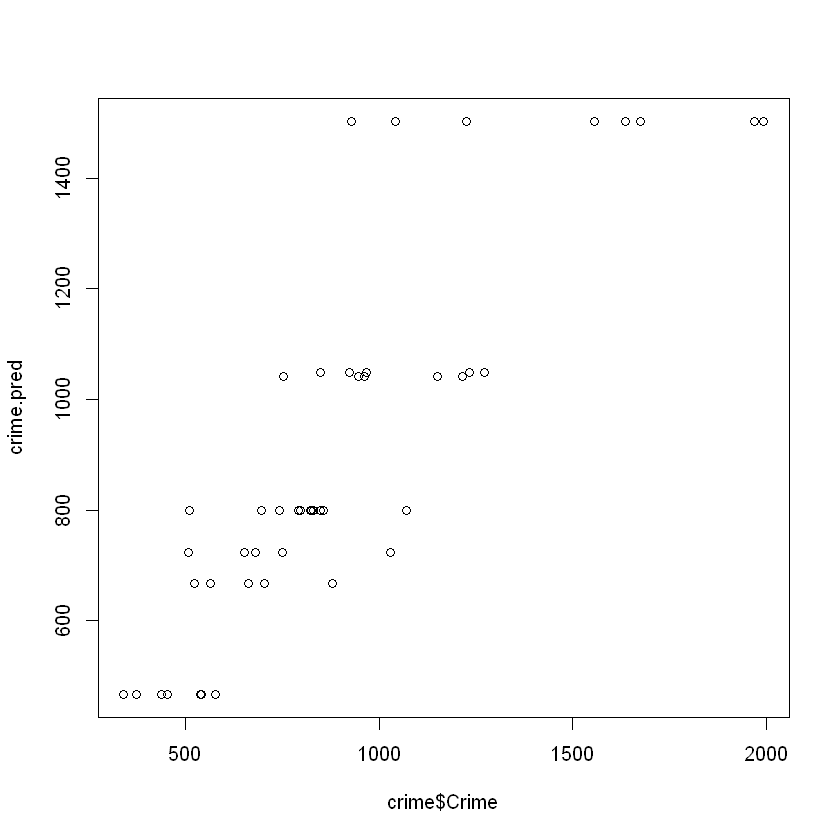

In [268]:
plot(crime$Crime,crime.pred)

In [17]:
#sum of squared errors
SSE<-sum((crime.pred-crime$Crime)^2)
SSE

[1] 1895722

In [18]:
#sum of squared deviations of y around its mean
SST<-sum((crime$Crime-mean(crime$Crime))^2)
SST

[1] 6880928

In [19]:
#R-squared value of the model
R.sq<-1-SSE/SST
R.sq

[1] 0.7244962

R-squared value shows a good performance for regression tree model. However, this is not the true performance of model and we know the model is overfitted due to having too many variables.

We can use cross validation to see if pruning the tree helps improve the model.

### Cross-validation for pruning the tree

We look at deviance of trees with different number of leaves, using cross-validation to see if pruning helps:

In [20]:
set.seed(1)
cv.crime <- cv.tree(crime.tree)

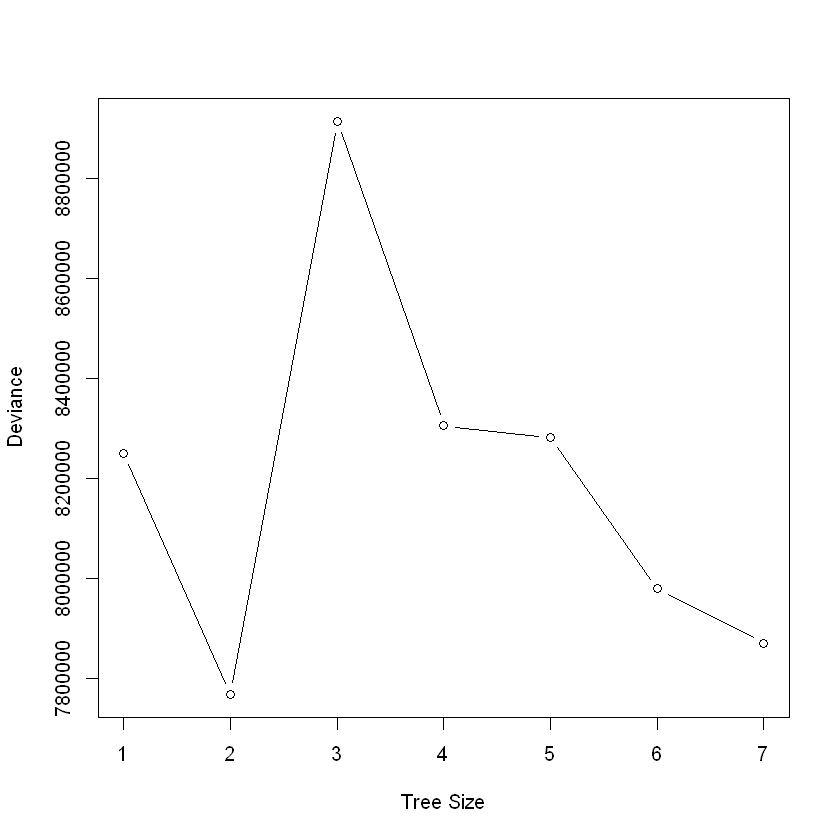

In [21]:
plot(cv.crime$size, cv.crime$dev,type="b",
    xlab="Tree Size",
    ylab="Deviance")

In [22]:
min(cv.crime$dev)

[1] 7767232

Deviance is very similar to SSE. We notice that deviance is larger than both errors.

It seems that the model has the lowest error with 2 leaves. So, we can prune and and see how it improves the performance:

In [23]:
crime.pruned<-prune.tree(crime.tree, best = 2)

In [24]:
summary(crime.pruned)


Regression tree:
snip.tree(tree = crime.tree, nodes = 2:3)
Variables actually used in tree construction:
[1] "Po1"
Number of terminal nodes:  2 
Residual mean deviance:  97410 = 4383000 / 45 
Distribution of residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-622.800 -193.200   -5.609    0.000  147.300  862.200 

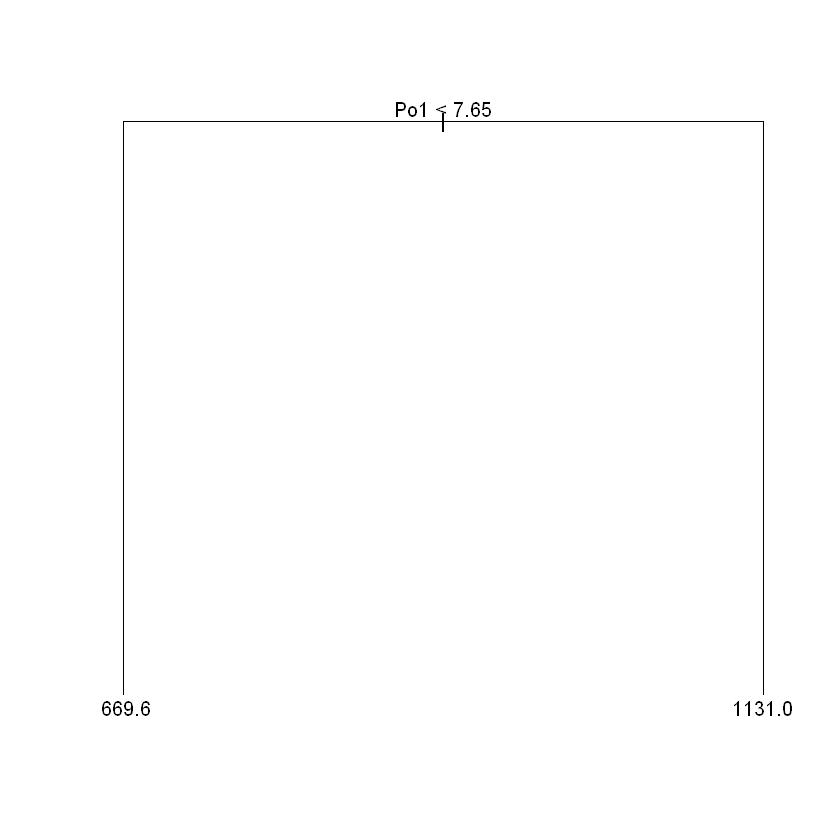

In [25]:
plot(crime.pruned)
text(crime.pruned,pretty=0)

In [26]:
pruned.pred<-predict(crime.pruned)

In [27]:
SSE.pruned<-sum((pruned.pred-crime$Crime)^2)
SSE.pruned

[1] 4383406

In [28]:
SST.pruned<-sum((crime$Crime-mean(crime$Crime))^2)
SST.pruned

[1] 6880928

In [29]:
#R-squared
1-SSE.pruned/SST.pruned

[1] 0.3629629

We can't really use this model to predict due to being too simple and low R-squared value.
However, we can use the tree to divide our data set into 2 subsets:

    - Subset with Po1<7.65 
    - Subset with Po1>7.65
Then we can build a linear regression model for each subset. 

### Linear regression using subsets of regression tree

In [35]:
subset1<-crime[crime$Po1<=7.65,]
subset2<-crime[crime$Po1>7.65,]

In [37]:
lm_1<-train(Crime~.,data=subset1,
           method="lm",
           trControl=trainControl(method="cv",number=5)
           )

In [40]:
summary(lm_1)


Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-109.147  -52.803   -6.495   53.784  127.196 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept)   -48.5477  2044.9766  -0.024   0.9817  
M              45.8622    58.6256   0.782   0.4597  
So            380.4815   223.1072   1.705   0.1319  
Ed            187.9074    89.5799   2.098   0.0741 .
Po1            -3.5138   157.7513  -0.022   0.9829  
Po2            44.6382   148.5528   0.300   0.7725  
LF           1059.3652  1187.9722   0.892   0.4021  
M.F           -22.5521    21.4677  -1.051   0.3284  
Pop            10.6413     5.0929   2.089   0.0750 .
NW              0.1010     7.9019   0.013   0.9902  
U1           4878.2802  4874.8165   1.001   0.3503  
U2             -5.5126   133.5094  -0.041   0.9682  
Wealth         -0.1022     0.1752  -0.583   0.5779  
Ineq            4.7779    35.5290   0.134   0.8968  
Prob        -7317.4407  3280.7511  -2.23

In [38]:
lm_2<-train(Crime~.,data=subset2,
           method="lm",
           trControl=trainControl(method="cv",number=5)
           )

In [41]:
summary(lm_2)


Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-206.805 -120.407   -9.489  103.985  248.226 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept) -8634.1701  2366.4043  -3.649  0.00651 **
M               5.6032    96.1623   0.058  0.95496   
So            179.6267   409.5210   0.439  0.67254   
Ed            263.0845   146.4229   1.797  0.11010   
Po1           235.2349   166.1289   1.416  0.19452   
Po2          -140.7023   193.8759  -0.726  0.48869   
LF           1442.4214  4832.4463   0.298  0.77294   
M.F            -1.2379    54.8160  -0.023  0.98254   
Pop            -3.7686     2.8833  -1.307  0.22751   
NW             -0.5396    24.5039  -0.022  0.98297   
U1          -3779.9843 10923.3434  -0.346  0.73823   
U2            163.7106   150.5361   1.088  0.30848   
Wealth          0.3017     0.2051   1.471  0.17946   
Ineq          155.3754    65.5077   2.372  0.04511 * 
Prob        -3624.0711  4

By looking at these 2 models, we can observe R-squared values and see each model has a decent performance.
Also, it is clear that coefficients are different in each subset and significant variables are not the same in these 2 models.

**Next we will use random forest method to see if we can achieve a better model.**

### Random Forest Regression

In [43]:
#Number of variables randomly sampled as candidates at each split
numpred<-4

In [44]:
set.seed(1)

#building random forest model
crime.rf<-randomForest(Crime~.,data=crime,
                       mtry=numpred,
                       importance=TRUE)

In [46]:
summary(crime.rf)


                Length Class  Mode     
call              5    -none- call     
type              1    -none- character
predicted        47    -none- numeric  
mse             500    -none- numeric  
rsq             500    -none- numeric  
oob.times        47    -none- numeric  
importance       30    -none- numeric  
importanceSD     15    -none- numeric  
localImportance   0    -none- NULL     
proximity         0    -none- NULL     
ntree             1    -none- numeric  
mtry              1    -none- numeric  
forest           11    -none- list     
coefs             0    -none- NULL     
y                47    -none- numeric  
test              0    -none- NULL     
inbag             0    -none- NULL     
terms             3    terms  call     

In [319]:
names(crime.rf)

[1] "call"            "type"            "predicted"       "mse"            
 [5] "rsq"             "oob.times"       "importance"      "importanceSD"   
 [9] "localImportance" "proximity"       "ntree"           "mtry"           
[13] "forest"          "coefs"           "y"               "test"           
[17] "inbag"           "terms"

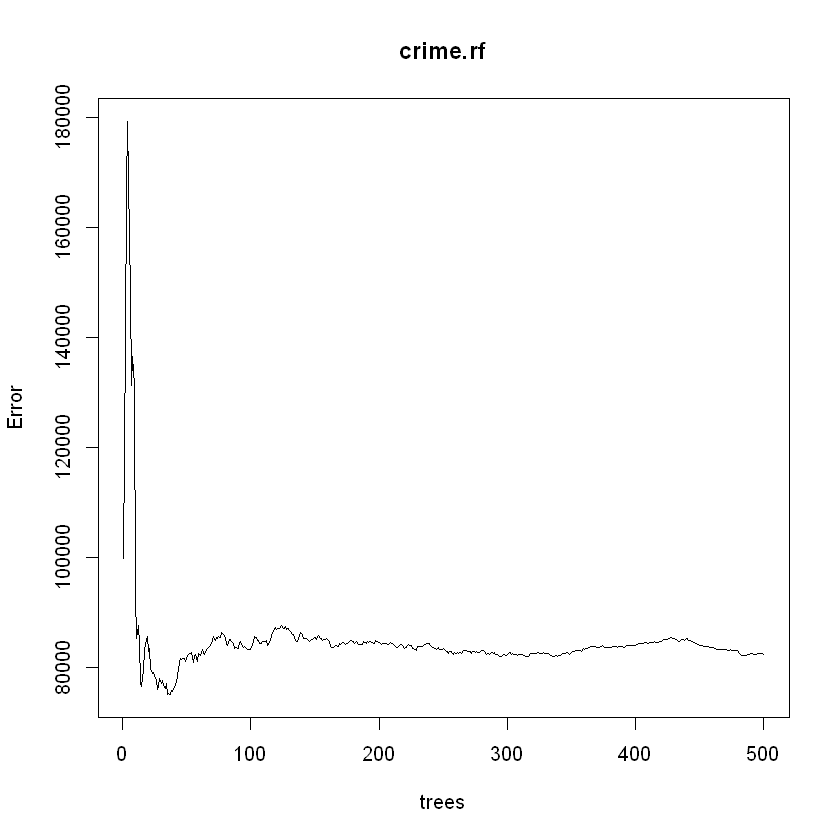

In [322]:
plot(crime.rf)

The plot shows after 200 trees, the error stays almost flat.

In [61]:
importance(crime.rf)

,%IncMSE,IncNodePurity
M,1.5433378,205277.24
So,2.2457511,21269.39
Ed,3.7399142,264814.17
Po1,11.9531848,1084645.06
Po2,11.0005698,1057598.29
LF,3.2283145,304235.71
M.F,1.5315964,235479.84
Pop,-0.3558573,325124.91
NW,8.7914688,495462.04
U1,-0.3078521,155244.37


In [60]:
sort(importance(crime.rf)[,1],decreasing=TRUE)

Po1        Po2       Prob         NW     Wealth         Ed         LF 
11.9531848 11.0005698  8.8829484  8.7914688  4.3542465  3.7399142  3.2283145 
        U2         So       Ineq       Time          M        M.F         U1 
 2.7747464  2.2457511  2.1762932  2.1279085  1.5433378  1.5315964 -0.3078521 
       Pop 
-0.3558573

In random forest model, we can see that Po1 is again the most important variable.

In [323]:
rf.pred<-predict(crime.rf)

In [325]:
SSE.rf<-sum((rf.pred-crime$Crime)^2)
SSE.rf

[1] 3872504

In [326]:
SST<-sum((crime$Crime-mean(crime$Crime))^2)
SST

[1] 6880928

In [346]:
#R-squared
1-SSE.rf/SST

[1] 0.437212

By looking at R-squared value, we observe that the goodness of fit has not gotten better.With such small data set, our models are prone to overfitting and having a low quality for random forest model is not a surprise.

## Question 10.2

Describe a situation or problem from your job, everyday life, current events, etc., for which a logistic
regression model would be appropriate. List some (up to 5) predictors that you might use.

**Answer:**

An application of logistic regression would be in a company, to find probability for promoting employees and classifying them as possible candidates for promotion.
Some features or variables would be the level of education, number of years in a current position, age, salary and utilization rate.

## Question 10.3

  1.Using the GermanCredit data set germancredit.txt from
http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german / (description at
http://archive.ics.uci.edu/ml/datasets/Statlog+%28German+Credit+Data%29 ), use logistic
regression to find a good predictive model for whether credit applicants are good credit risks or
not. Show your model (factors used and their coefficients), the software output, and the quality 
of fit. You can use the glm function in R. To get a logistic regression (logit) model on data where
the response is either zero or one, use family=binomial(link=”logit”) in your glm
function call.
2. Because the model gives a result between 0 and 1, it requires setting a threshold probability to
separate between “good” and “bad” answers. In this data set, they estimate that incorrectly
identifying a bad customer as good, is 5 times worse than incorrectly classifying a good
customer as bad. Determine a good threshold probability based on your model.

In [64]:
#Loading the data
g.credit<-read.table("germancredit.txt",header=FALSE,stringsAsFactors=FALSE)

In [65]:
#Making sure there is no missing values
sum(is.na(g.credit))

[1] 0

In [66]:
#Checking the first 6 observations
head(g.credit)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21
,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,...,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<int>
1,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
2,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
3,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
4,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
5,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
6,A14,36,A32,A46,9055,A65,A73,2,A93,A101,...,A124,35,A143,A153,1,A172,2,A192,A201,1


In [67]:
#Checking the structure of data
str(g.credit)

'data.frame':	1000 obs. of  21 variables:
 $ V1 : chr  "A11" "A12" "A14" "A11" ...
 $ V2 : int  6 48 12 42 24 36 24 36 12 30 ...
 $ V3 : chr  "A34" "A32" "A34" "A32" ...
 $ V4 : chr  "A43" "A43" "A46" "A42" ...
 $ V5 : int  1169 5951 2096 7882 4870 9055 2835 6948 3059 5234 ...
 $ V6 : chr  "A65" "A61" "A61" "A61" ...
 $ V7 : chr  "A75" "A73" "A74" "A74" ...
 $ V8 : int  4 2 2 2 3 2 3 2 2 4 ...
 $ V9 : chr  "A93" "A92" "A93" "A93" ...
 $ V10: chr  "A101" "A101" "A101" "A103" ...
 $ V11: int  4 2 3 4 4 4 4 2 4 2 ...
 $ V12: chr  "A121" "A121" "A121" "A122" ...
 $ V13: int  67 22 49 45 53 35 53 35 61 28 ...
 $ V14: chr  "A143" "A143" "A143" "A143" ...
 $ V15: chr  "A152" "A152" "A152" "A153" ...
 $ V16: int  2 1 1 1 2 1 1 1 1 2 ...
 $ V17: chr  "A173" "A173" "A172" "A173" ...
 $ V18: int  1 1 2 2 2 2 1 1 1 1 ...
 $ V19: chr  "A192" "A191" "A191" "A191" ...
 $ V20: chr  "A201" "A201" "A201" "A201" ...
 $ V21: int  1 2 1 1 2 1 1 1 1 2 ...


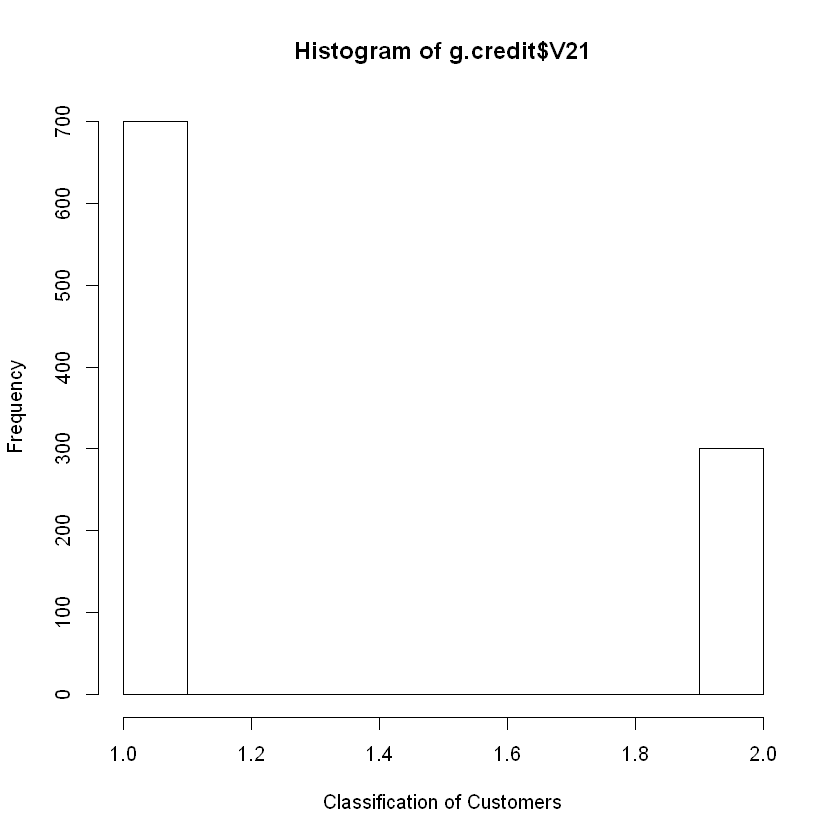

In [68]:
#checking the distribution of response
hist(g.credit$V21,
    xlab="Classification of Customers") 

In [69]:
#Converting response variable to 0 & 1 since for logistric model : 0<=y<=1

g.credit$V21[g.credit$V21==1]<-0 # good response
g.credit$V21[g.credit$V21==2]<-1 #bad response


Caution : order of assigning values matter here.If we assign 2<--1 first, all values will be 0.

In [70]:
#Making sure the new values are correctly converted
head(g.credit)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21
,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,...,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<dbl>
1,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,0
2,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,1
3,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,0
4,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,0
5,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,1
6,A14,36,A32,A46,9055,A65,A73,2,A93,A101,...,A124,35,A143,A153,1,A172,2,A192,A201,0


In [71]:
#Splitting data into training and testing

set.seed(1)
train<-sample(1:nrow(g.credit),round(nrow(g.credit)*0.7))

training<-g.credit[train,]
testing<-g.credit[-train,]

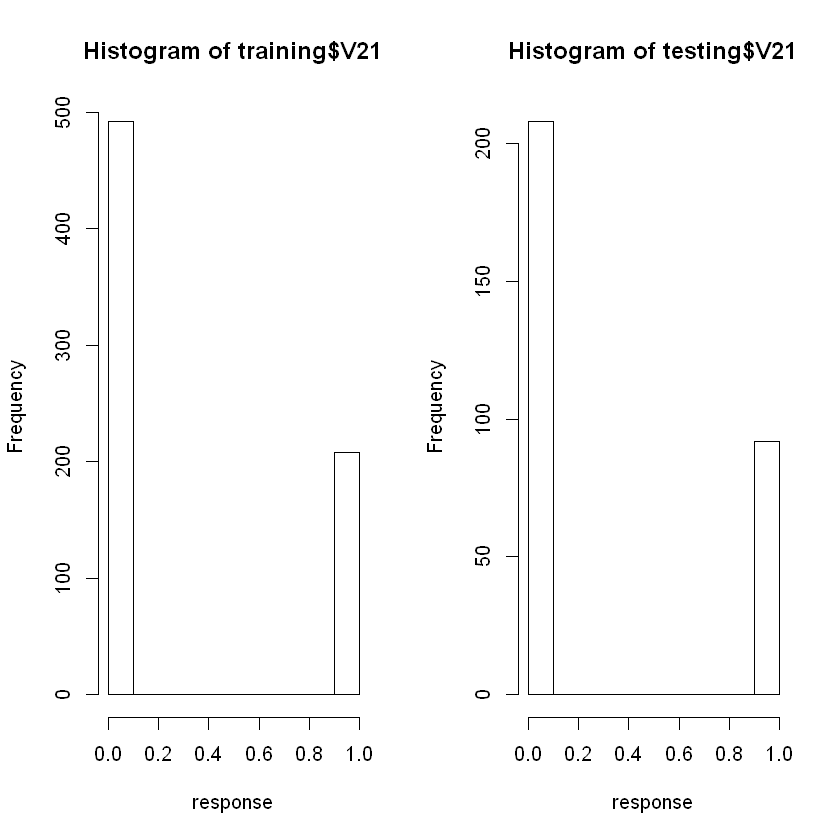

In [72]:
#checking distribution of responses in training and testing subsets
par(mfrow=c(1,2))

hist(training$V21,xlab="response")
hist(testing$V21,xlab="response")

### Logistic regression model 1, using all variables

In [73]:
#Fitting a logistic regression model
set.seed(1)
glm_m1<-glm(V21~.,data=training,family=binomial(link="logit"))

In [74]:
summary(glm_m1)


Call:
glm(formula = V21 ~ ., family = binomial(link = "logit"), data = training)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4438  -0.6861  -0.3608   0.6750   2.4540  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  3.823e-01  1.332e+00   0.287 0.774162    
V1A12       -5.201e-01  2.681e-01  -1.940 0.052408 .  
V1A13       -1.150e+00  4.473e-01  -2.570 0.010173 *  
V1A14       -1.675e+00  2.750e-01  -6.091 1.12e-09 ***
V2           2.570e-02  1.159e-02   2.217 0.026647 *  
V3A31        8.440e-02  6.580e-01   0.128 0.897943    
V3A32       -8.078e-01  4.996e-01  -1.617 0.105907    
V3A33       -7.683e-01  5.372e-01  -1.430 0.152634    
V3A34       -1.446e+00  5.127e-01  -2.821 0.004784 ** 
V4A41       -1.513e+00  4.479e-01  -3.379 0.000728 ***
V4A410      -2.412e+00  1.160e+00  -2.080 0.037543 *  
V4A42       -5.496e-01  3.195e-01  -1.720 0.085354 .  
V4A43       -9.142e-01  3.024e-01  -3.023 0.002503 ** 
V4A44       -4.163e

As we have many variables, we definitly have overfitting in our model. We will use most significant variables based on their p-values to build a simpler model. Below we filter all variables with p-values more than 5% and only choose variables which fall in 95% confidence interval.

In [75]:
data.frame(summary(glm_m1)$coef[summary(glm_m1)$coef[,4] <= .05, 4])

,summary.glm_m1..coef.summary.glm_m1..coef...4.....0.05..4.
,<dbl>
V1A13,1.017285e-02
V1A14,1.120252e-09
V2,2.664655e-02
V3A34,4.783571e-03
V4A41,7.283376e-04
V4A410,3.754332e-02
V4A43,2.503233e-03
V6A64,3.482266e-02
V6A65,1.190983e-02


### Logistic regression model 2, using significant variables

In [76]:
set.seed(1)
glm_m2<- glm(V21 ~ V1+V2+V3+V4+V6+V7+V8+V12+V13+V14+V15+V20,
          family=binomial,
         data=training)
summary(glm_m2)


Call:
glm(formula = V21 ~ V1 + V2 + V3 + V4 + V6 + V7 + V8 + V12 + 
    V13 + V14 + V15 + V20, family = binomial, data = training)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1343  -0.7151  -0.3829   0.6860   2.4613  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)   1.954704   0.891687   2.192 0.028369 *  
V1A12        -0.576472   0.261484  -2.205 0.027481 *  
V1A13        -1.246843   0.431631  -2.889 0.003869 ** 
V1A14        -1.633312   0.268529  -6.082 1.18e-09 ***
V2            0.036245   0.009018   4.019 5.83e-05 ***
V3A31        -0.077212   0.626544  -0.123 0.901921    
V3A32        -0.971152   0.467517  -2.077 0.037778 *  
V3A33        -0.743337   0.523613  -1.420 0.155715    
V3A34        -1.447406   0.498458  -2.904 0.003687 ** 
V4A41        -1.375418   0.415248  -3.312 0.000925 ***
V4A410       -2.141135   1.005226  -2.130 0.033171 *  
V4A42        -0.448810   0.306760  -1.463 0.143450    
V4A43        -0.939346  

By looking at AIC for both models, we can see that the model 2 is showing a better performance, having lower value than model 1.

If we look at the p-values of variables in model 2, we can see there is room for refinement, but we will proceed with model 2 for this homework.

In [77]:
data.frame(summary(glm_m2)$coef[summary(glm_m2)$coef[,4] <= .05, 4])

,summary.glm_m2..coef.summary.glm_m2..coef...4.....0.05..4.
,<dbl>
(Intercept),2.836938e-02
V1A12,2.748119e-02
V1A13,3.868643e-03
V1A14,1.183683e-09
V2,5.834709e-05
V3A32,3.777820e-02
V3A34,3.687023e-03
V4A41,9.253936e-04
V4A410,3.317136e-02


### Threshold of logistic regression model based on cost of misclassification

The output of a logistic regression model is a probability. We need to select a threshold value. If the probability is greater than this threshold value, the event is predicted to happen otherwise it is predicted not to happen.

In this study case,it is worse to class a customer as good when they are bad (5), than it is to class a customer as bad when they are good (1).

So for finding the most cost-efficient model, we calculate the cost of misclassification for different values of threshold and pick one which results in lowest cost.

In [78]:
#getting predicted values from model 2
glm_pred2<-predict(glm_m2,newdata = testing[,-21],type="response")

In [79]:
#function inputs: predicted values from model
        # outputs: cost of misclassification

cost_func<-function(threshold,prediction){
    #converting True/False to 1/0
    response<-as.integer(prediction>threshold)
    false_pos<-(testing$V21==1)& (prediction<threshold)
    false_neg<-(testing$V21==0)&(prediction>threshold)
   
    cost<-sum(false_pos)*5+sum(false_neg)
    
    return(cost)
  
}

In [80]:
cost_vector<-c() # to store cost values
threshold_vector<-c() # to store threshold values
for(i in 1:50){
    
    cost_vector<-c(cost_vector,cost_func(i/100,glm_pred2))
    threshold_vector<-c(threshold_vector,i/100)   
}

In [81]:
ind<-which.min(cost_vector) # index of lowest cost
threshold_vector[ind] # threshold resulting in lowest cost

[1] 0.13

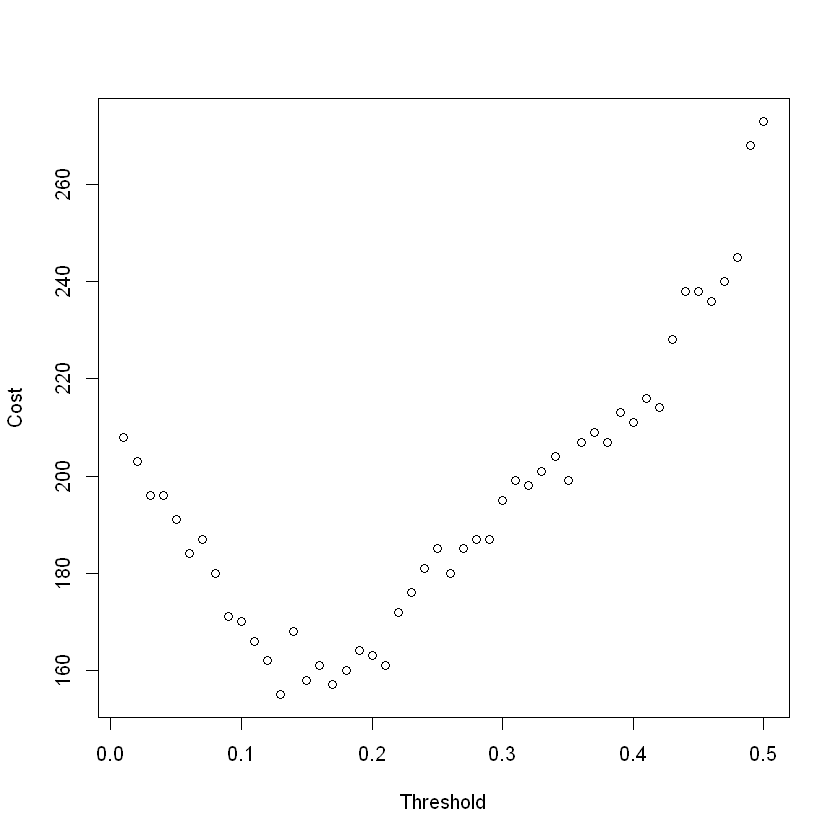

In [82]:
#visualizing cost versus threshold
plot(threshold_vector,cost_vector,
    xlab="Threshold",
    ylab="Cost")

So, threshold of 0.13 for classifying the output probabilities will give us the lowest cost of misclassification.

We will use this threshold, and build our confusion matrix.

In [87]:
m2_response<-as.integer(glm_pred2>0.13)

confusionMatrix(as.factor(m2_response),as.factor(testing$V21))

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0  88   7
         1 120  85
                                          
               Accuracy : 0.5767          
                 95% CI : (0.5186, 0.6332)
    No Information Rate : 0.6933          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.2585          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.4231          
            Specificity : 0.9239          
         Pos Pred Value : 0.9263          
         Neg Pred Value : 0.4146          
             Prevalence : 0.6933          
         Detection Rate : 0.2933          
   Detection Prevalence : 0.3167          
      Balanced Accuracy : 0.6735          
                                          
       'Positive' Class : 0               
                              

The accuracy of the model goes down as we choose to accept more misclassification of 
good customers as bad, and minimizie misclassification of bad customers as good.

We can also find area under the curve (AUC) of the model:

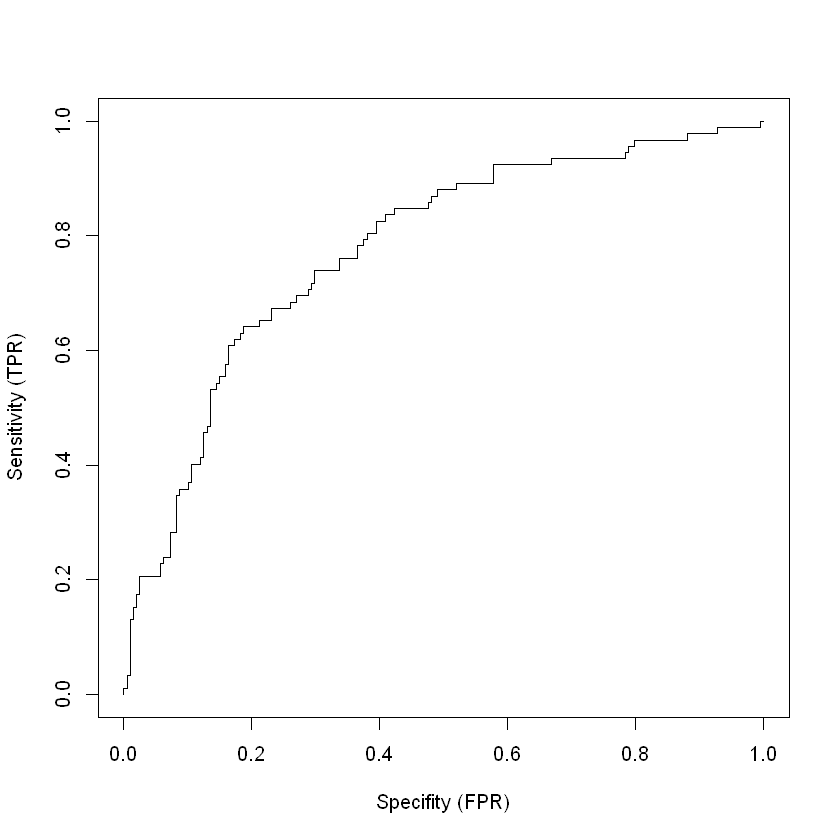

In [58]:
prediction(glm_pred2,testing$V21) %>%
  performance(measure = "tpr", x.measure = "fpr") %>%
  plot(xlab="Specifity (FPR)",
      ylab="Sensitivity (TPR)")

In [90]:
prediction(m2_response,testing$V21)%>%
    performance(measure="auc")%>%
    .@y.values

[[1]]
[1] 0.673495

The Area Under the Curve (AUC) evaluates the model’s performance, regardless of the chosen decision boundary. The perfect machine learning model will have an AUC of 1.0 , while a random one will have an AUC of 0.5. A good model will be over 0.7, a great one will be over 0.85. 


The AUC value is a relative value. It is also useful if we build other models using different methods and compare them using this value.

However, having AUC of 0.67 for this model, we can see that it has a decent performance.